In [1]:
from process import *
from calculate import *
from plots import *
from envelopes import *
from supports import *

import numpy as np
import matplotlib.pyplot as plt

# Source

In [2]:
folder = "data_190925_215938_blue_Nq2_Nt1_Om0.6_wd5.177_wq4.0_sft-0.146_wc6.5_g0.2_wsb0.0164"

## Get data

In [3]:
home = "/home/student/thesis/"
srcfolder = home + folder
ID = getID(srcfolder)
Nq, Nc, Nt, wq, shift, wc, Ec, g, sb, t0, t1, t2, t3, tg, smooth, Q, Np, H, psi0, e_ops, options, Omega, wd, Omegaq, Omegac, dw, wdq, wdc = getparams(srcfolder)
quants = getquants(srcfolder)
times, states, expect, e0, g1, e1, g0, coupling = load_data(quants, srcfolder)
if Nt == 1:
    H_args = {'t0' : t0, 't1' : t1, 't2' : t2, 't3' : t3, 'tg' : tg,
              'Q'  : Q, 'smooth' : smooth, 'Nt' : Nt, 'wd' : wd}
elif Nt == 2:
    H_args = {'t0' : t0, 't1' : t1, 't2' : t2, 't3' : t3, 'tg' : tg,
              'Q'  : Q, 'smooth' : smooth, 'Nt' : Nt, 'wdq' : wdq, 'wdc' : wdc}

In [5]:
""" SIDEBAND COUPLING """

smoothen_method = 'savgol'

if 'e0' in quants:
    e0_macro, e0_macro_times = remove_micromotion(e0, times, method=smoothen_method)
if 'g0' in quants:
    g0_macro, g0_macro_times = remove_micromotion(g0, times, method=smoothen_method)
if 'e1' in quants:
    e1_macro, e1_macro_times = remove_micromotion(e1, times, method=smoothen_method)
if 'g1' in quants:
    g1_macro, g1_macro_times = remove_micromotion(g1, times, method=smoothen_method)
if ('e1' in quants and 'g0' in quants):
    e1g0_macro, e1g0_macro_times = remove_micromotion(e1-g0, times, method=smoothen_method)
if ('e0' in quants and 'g1' in quants):
    e0g1_macro, e0g1_macro_times = remove_micromotion(e0-g1, times, method=smoothen_method)

if sb == 'red':
    wsb = sideband_freq(e0g1_macro, e0g1_macro_times)
elif sb == 'blue':
    wsb = sideband_freq(e1g0_macro, e1g0_macro_times)

print("wsb =", wsb/2/pi, "GHz")

wsb = 0.0164424034577 GHz


## Visualize data

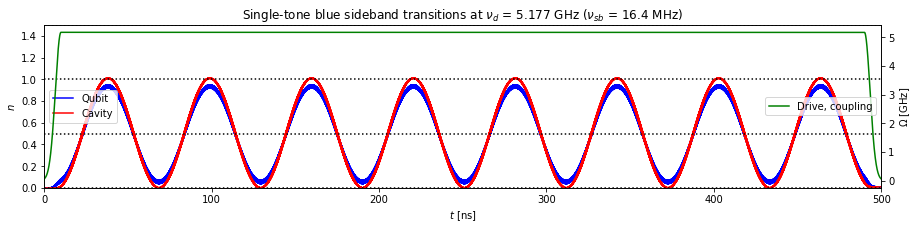

In [6]:
""" EXPECTATION VALUES """

xlim = None
ylim = None

if sb == 'red':
    if Nt == 1:
        figqc = sb_expect(times, expect, sb, Nt, H_args, coupling, xlim=xlim, ylim=ylim, figsize=[15,3], wd=wd, wsb=wsb)
    elif Nt == 2:
        figqc = sb_expect(times, expect, sb, Nt, H_args, coupling, xlim=xlim, ylim=ylim, figsize=[15,3], wsb=wsb)
elif sb == 'blue':
    if Nt == 1:
        figqc = sb_expect(times, expect, sb, Nt, H_args, coupling, xlim=xlim, ylim=ylim, figsize=[15,3], wd=wd, wsb=wsb)
    elif Nt == 2:
        figqc = sb_expect(times, expect, sb, Nt, H_args, coupling, xlim=xlim, ylim=ylim, figsize=[15,3], wsb=wsb)

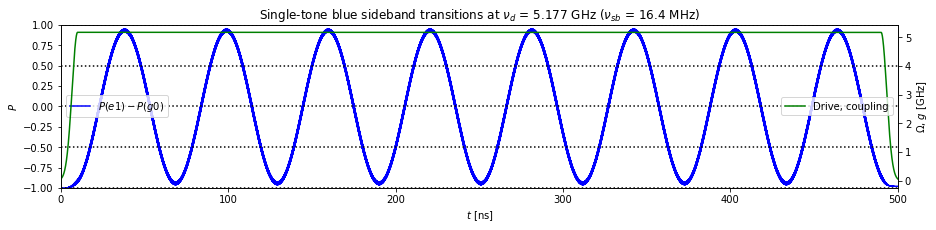

In [7]:
"""COMBINED PROBABILITIES"""

xlim = None#[0, 3]
ylim = None#[0.99, 1.01]

if sb == 'red':
    if Nt == 1:
        fig = sb_combined_probs(times, sb, Nt, H_args, coupling,
                                xlim=xlim, ylim=ylim, figsize=[15,3], e0=e0, g1=g1, wd=wd, wsb=wsb)
    elif Nt == 2:
        fig = sb_combined_probs(times, sb, Nt, H_args, coupling,
                                xlim=xlim, ylim=ylim, figsize=[15,3], e0=e0, g1=g1, wsb=wsb)
elif sb == 'blue':
    if Nt == 1:
        fig = sb_combined_probs(times, sb, Nt, H_args, coupling,
                                xlim=xlim, ylim=ylim, figsize=[15,3], e1=e1, g0=g0, wd=wd, wsb=wsb)
    elif Nt == 2:
        fig = sb_combined_probs(times, sb, Nt, H_args, coupling,
                                xlim=xlim, ylim=ylim, figsize=[15,3], e1=e1, g0=g0, wsb=wsb)

# Play around

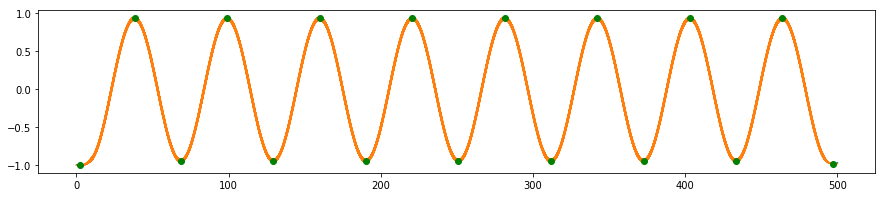

0.000606213122716


In [8]:
plt.figure(figsize=[15,3])
if sb == 'red':
    x, t = cluster(e0g1_macro, e0g1_macro_times)
    plt.plot(e0g1_macro_times, e0g1_macro, alpha=1)
    plt.plot(times, e0-g1)
elif sb == 'blue':
    x, t = cluster(e1g0_macro, e1g0_macro_times)
    plt.plot(e1g0_macro_times, e1g0_macro, alpha=1)
    plt.plot(times, e1-g0)
plt.plot(t, x, 'o', color='g')
# plt.xlim([490,500])
# plt.ylim([0.39, 0.42])
plt.show()
print(e0g1_macro[-1])

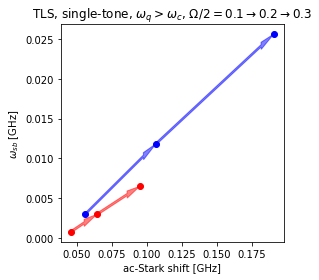

In [9]:
# Single-tone, wq > wc, Omega = [0.1, 0.2, 0.3]
shift_red = [0.0455, 0.0641, 0.0948]
wsb_red = [0.0007435, 0.00294, 0.006479]
shift_blue = [0.0561, 0.1064, 0.1905]
wsb_blue = [0.003019, 0.01183, 0.02563]

plt.figure(figsize=[4,4])
plt.plot(shift_red, wsb_red, 'o', c='r')
plt.plot(shift_blue, wsb_blue, 'o', c='b')
for i in range(2):
    plt.arrow(shift_red[i], wsb_red[i], shift_red[i+1]-shift_red[i], wsb_red[i+1]-wsb_red[i],
              width=0.0003, length_includes_head=True, head_length=30*0.0003, head_width=3*0.0003,
              color='r', alpha=0.5)
    plt.arrow(shift_blue[i], wsb_blue[i], shift_blue[i+1]-shift_blue[i], wsb_blue[i+1]-wsb_blue[i],
              width=0.0003, length_includes_head=True, head_length=30*0.0003, head_width=3*0.0003,
              color='b', alpha=0.5)
plt.xlabel("ac-Stark shift [GHz]")
plt.ylabel("$\\omega_{{sb}}$ [GHz]")
plt.title("TLS, single-tone, $\\omega_q > \\omega_c$, $\\Omega/2 = 0.1 \\rightarrow 0.2 \\rightarrow 0.3$")
plt.show()

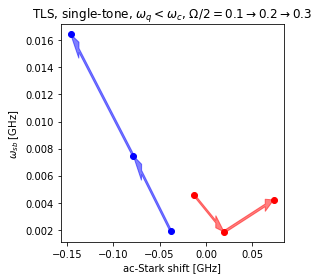

In [10]:
# Single-tone, wq < wc, Omega = [0.1, 0.2, 0.3]
shift_red = [-0.0131, 0.0196, 0.073]
wsb_red = [0.0046, 0.001855, 0.004214]
shift_blue = [-0.0377, -0.0784, -0.146]
wsb_blue = [0.001896, 0.007476, 0.01644]

plt.figure(figsize=[4,4])
plt.plot(shift_red, wsb_red, 'o', c='r')
plt.plot(shift_blue, wsb_blue, 'o', c='b')
for i in range(2):
    plt.arrow(shift_red[i], wsb_red[i], shift_red[i+1]-shift_red[i], wsb_red[i+1]-wsb_red[i],
              width=0.0002, length_includes_head=True, head_length=30*0.0003, head_width=3*0.0003,
              color='r', alpha=0.5)
    plt.arrow(shift_blue[i], wsb_blue[i], shift_blue[i+1]-shift_blue[i], wsb_blue[i+1]-wsb_blue[i],
              width=0.0003, length_includes_head=True, head_length=30*0.0003, head_width=4*0.0003,
              color='b', alpha=0.5)
plt.xlabel("ac-Stark shift [GHz]")
plt.ylabel("$\\omega_{{sb}}$ [GHz]")
plt.title("TLS, single-tone, $\\omega_q < \\omega_c$, $\\Omega/2 = 0.1 \\rightarrow 0.2 \\rightarrow 0.3$")
plt.show()

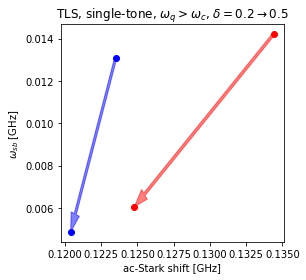

In [11]:
# Double-tone, wq < wc, dw = [0.2, 0.5]
shift_red = [0.13439, 0.1248]
wsb_red = [0.01421, 0.006069]
shift_blue = [0.1235, 0.1204]
wsb_blue = [0.01308, 0.004875]

plt.figure(figsize=[4,4])
plt.plot(shift_red, wsb_red, 'o', c='r')
plt.plot(shift_blue, wsb_blue, 'o', c='b')
for i in range(1):
    plt.arrow(shift_red[i], wsb_red[i], shift_red[i+1]-shift_red[i], wsb_red[i+1]-wsb_red[i],
              width=0.00015, length_includes_head=True, head_length=3*0.0003, head_width=2*0.0003,
              color='r', alpha=0.5)
    plt.arrow(shift_blue[i], wsb_blue[i], shift_blue[i+1]-shift_blue[i], wsb_blue[i+1]-wsb_blue[i],
              width=0.00015, length_includes_head=True, head_length=3*0.0003, head_width=2*0.0003,
              color='b', alpha=0.5)
plt.xlabel("ac-Stark shift [GHz]")
plt.ylabel("$\\omega_{{sb}}$ [GHz]")
plt.title("TLS, single-tone, $\\omega_q > \\omega_c$, $\\delta = 0.2 \\rightarrow 0.5$")
plt.show()